# Black Friday Sales EDA

## Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.



## DATA PREPROCESSING

1. Check basic statistics of dataset
2. Check for missing values in the data
3. check for unique values in data
4. Perform EDA
5. Purchase Distribution
6. check for outliers
7. Analysis by Gender, Marital Status, occupation, occupation vs purchase , purchase by city, purchase by age group, etc
8. Drop unnecessary fields
9. Convert categorical data into integer using map function (e.g 'Gender' column)
10. missing value treatment
11. Rename columns
12. fill nan values
13. map range variables into integers (e.g 'Age' column

## Data Visualisation

1. visualize individul column
2. Age vs Purchased
3. Occupation vs Purchased
4. Productcategory1 vs Purchased
5. Productcategory2 vs Purchased
6. Productcategory3 vs Purchased
7. City category pie chart
8. check for more possible plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset=pd.read_csv('black_friday_train.csv')

In [3]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
# user id is not required so drop it
dataset.drop('User_ID',axis=1,inplace=True)  

In [6]:
# getting shape of data
dataset.shape

(550068, 11)

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Occupation,550068.0,8.076707,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,0.409653,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,12.668243,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


# Habdling missing values

In [8]:
# finding missing values
dataset.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
feature_with_na=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>=1]

In [10]:
feature_with_na

['Product_Category_2', 'Product_Category_3']

In [11]:
# finding total % of missing values in each category

for feature in feature_with_na:
    print(feature, np.round(dataset[feature].isnull().mean()*100,4), '% missinng values')

Product_Category_2 31.5666 % missinng values
Product_Category_3 69.6727 % missinng values


In [12]:
# will drop Product_Category_3 as it have much more missing values present

dataset.drop('Product_Category_3',axis=1,inplace=True)

In [13]:
dataset.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,15200


### Replacing missing values in Product_Category_2	 by its median

In [14]:
dataset['Product_Category_2'].median()

9.0

In [15]:
dataset['Product_Category_2']=dataset['Product_Category_2'].fillna(dataset['Product_Category_2'].median())

In [16]:
# check for any missing values preset now

dataset.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [17]:
dataset.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,P00069042,F,0-17,10,A,2,0,3,9.0,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,15200


# Handling categorical feature

1. We will do label encoding using map
2. Will convert categorical feature in dummy variable
3. will convert dtypes from object to int

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  object 
 2   Age                         550068 non-null  object 
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 42.0+ MB


In [19]:
dataset['Gender'].unique()

array(['F', 'M'], dtype=object)

In [20]:
dataset['Gender']=dataset['Gender'].map({'F':2, 'M':1})

In [21]:
dataset['Gender'].astype(int)

0         2
1         2
2         2
3         2
4         1
         ..
550063    1
550064    2
550065    2
550066    2
550067    2
Name: Gender, Length: 550068, dtype: int32

In [22]:
dataset['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [23]:
# label encoding for diggerent age group
dataset['Age']=dataset['Age'].map({'0-17':1, '55+':7, '26-35':3, '46-50':5, '51-55':6, '36-45':4, '18-25':2})

In [24]:
dataset['Age'].astype(int)

0         1
1         1
2         1
3         1
4         7
         ..
550063    6
550064    3
550065    3
550066    7
550067    5
Name: Age, Length: 550068, dtype: int32

In [25]:
# conversion of categorical feature in dummy variable
city_category=pd.get_dummies(dataset['City_Category'],drop_first=True)

In [26]:
dataset=pd.concat([dataset,city_category], axis=1)

In [27]:
dataset.head(1)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,B,C
0,P00069042,2,1,10,A,2,0,3,9.0,8370,0,0


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  uint8  
 11  C                           550068 non-null  uint8  
dtypes: float64(1), int64(6), object(3), uint8(2)
memory usage: 43.0+ MB


In [57]:
dataset['B']=dataset['B'].astype(int)

In [58]:
dataset['C']=dataset['C'].astype(int)

In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
 9   B                           550068 non-null  int32  
 10  C                           550068 non-null  int32  
dtypes: float64(1), int32(3), int64(6), object(1)
memory usage: 39.9+ MB


In [32]:
dataset.drop(['City_Category'], axis=1, inplace=True)

In [33]:
dataset.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,B,C
0,P00069042,2,1,10,2,0,3,9.0,8370,0,0
1,P00248942,2,1,10,2,0,1,6.0,15200,0,0
2,P00087842,2,1,10,2,0,12,9.0,1422,0,0
3,P00085442,2,1,10,2,0,12,14.0,1057,0,0
4,P00285442,1,7,16,4+,0,8,9.0,7969,0,1


In [45]:
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].str.replace('+', '')

In [46]:
dataset.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,B,C
0,P00069042,2,1,10,2,0,3,9.0,8370,0,0
1,P00248942,2,1,10,2,0,1,6.0,15200,0,0
2,P00087842,2,1,10,2,0,12,9.0,1422,0,0
3,P00085442,2,1,10,2,0,12,14.0,1057,0,0
4,P00285442,1,7,16,4,0,8,9.0,7969,0,1


In [47]:
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].astype(int)

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
 9   B                           550068 non-null  uint8  
 10  C                           550068 non-null  uint8  
dtypes: float64(1), int32(1), int64(6), object(1), uint8(2)
memory usage: 36.7+ MB


In [49]:
dataset.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,B,C
0,P00069042,2,1,10,2,0,3,9.0,8370,0,0
1,P00248942,2,1,10,2,0,1,6.0,15200,0,0
2,P00087842,2,1,10,2,0,12,9.0,1422,0,0
3,P00085442,2,1,10,2,0,12,14.0,1057,0,0
4,P00285442,1,7,16,4,0,8,9.0,7969,0,1


# Visualization of result for better understannding and getting desired observations

1. for different age groups we have done a label encoding as '0-17':1, '55+':7, '26-35':3, '46-50':5, '51-55':6, '36-45':4, '18-25':2

2. for male is shows blue color and for female orange (male:1, female:2)



<AxesSubplot:xlabel='Age', ylabel='Purchase'>

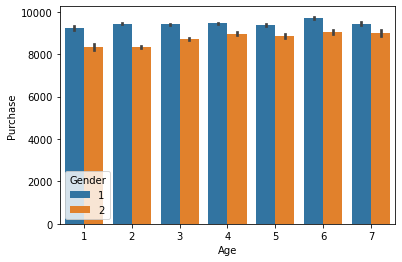

In [50]:
# first will check relation between age & purchase and will use hue as gender to get observation for each gender category


sns.barplot(x='Age', y='Purchase', hue='Gender', data=dataset)

## Purchasing of males as compare to female for different age groups is more

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

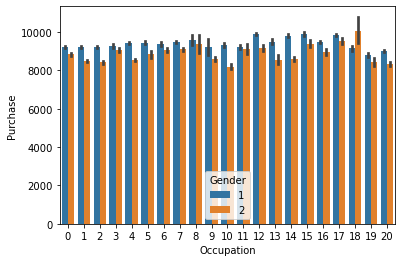

In [51]:


#  will check relation between occupation & purchase and will use hue as gender to get observation for each gender category

sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=dataset)

## for each occupation except 18 purchasing of male is higher than female

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

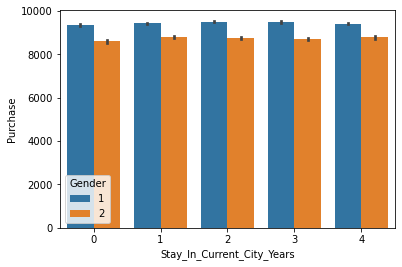

In [52]:

#  will check relation between occupation & purchase and will use hue as gender to get observation for each gender category

sns.barplot(x='Stay_In_Current_City_Years', y='Purchase', hue='Gender', data=dataset)


## for different period of staying in city purchasing of males is higher than females

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

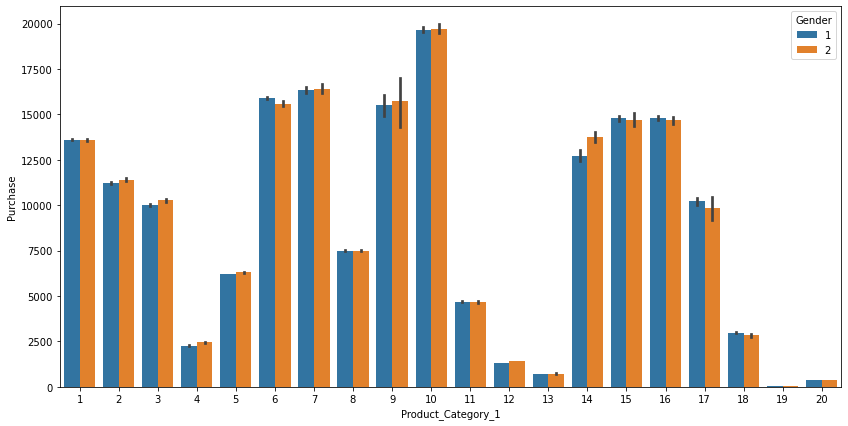

In [65]:
# will check relation between occupation & purchase and will use hue as gender to get observation for each gender category
plt.figure(figsize=(14,7))
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=dataset)

## except prouct 4,5,8,11,12,13,18,19,20 rest are in demand

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

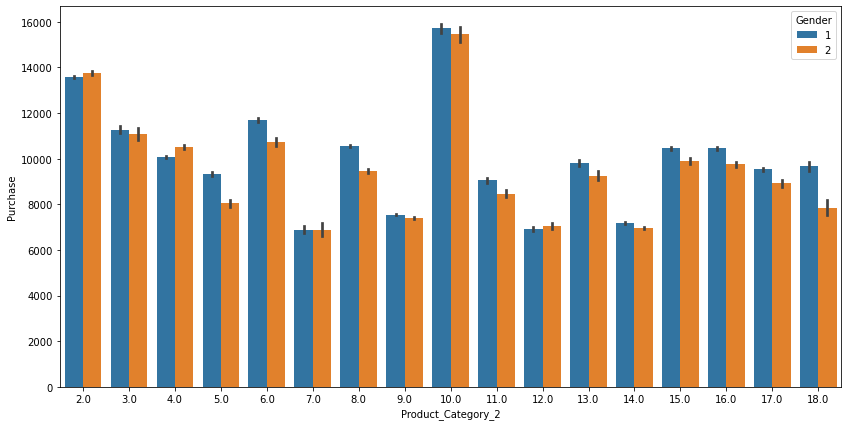

In [64]:
# will check relation between occupation & purchase and will use hue as gender to get observation for each gender category
plt.figure(figsize=(14,7))
sns.barplot(x='Product_Category_2', y='Purchase', hue='Gender', data=dataset)

## product 2 and 10 in high demand